# Hackathon-1 Harsh

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
df = pd.read_csv('House_prediction.csv')
# df.shape
# df.describe()
# df.dtypes
# df.isnull().any()

In [3]:
df['city'] = df['city'].astype('str')

In [4]:
# Setting '-' character in floor column to int32 value 0

df['floor'].replace('-', df[df['floor'] != '-']['floor'].astype('int32').mode()[0], inplace=True)
df['floor'] = df['floor'].astype('int32')
# df['floor'].mean()

# City-wise Display of average column values

In [5]:
cities = df.groupby('city').mean()
print(cities)

                      area     rooms  bathroom  parking spaces     floor  \
city                                                                       
Belo Horizonte  207.411765  3.020668  2.402226        1.955485  4.132750   
Campinas        137.561547  2.355217  1.960141        1.558030  4.519343   
Porto Alegre    103.609388  2.140821  1.725901        1.044426  4.081308   
Rio de Janeiro  105.347768  2.243837  1.756163        0.744171  5.321785   
São Paulo       158.899439  2.558859  2.467641        1.877527  5.900629   

                   hoa (R$)  rent amount (R$)  property tax (R$)  \
city                                                               
Belo Horizonte  2324.197138       3664.127981         272.782194   
Campinas         628.922626       2364.290739         147.657679   
Porto Alegre     491.618609       2337.699916         124.021794   
Rio de Janeiro  1079.432378       3232.904064         256.853431   
São Paulo       1169.627994       4652.793783         495.7

## Plotting the city wise column averages vs city

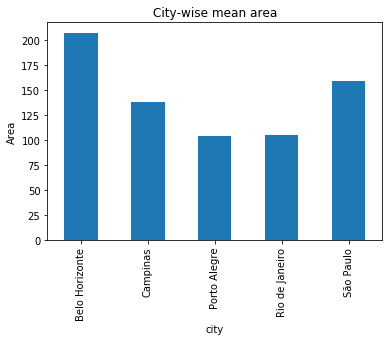

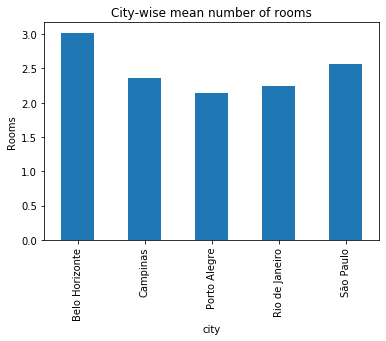

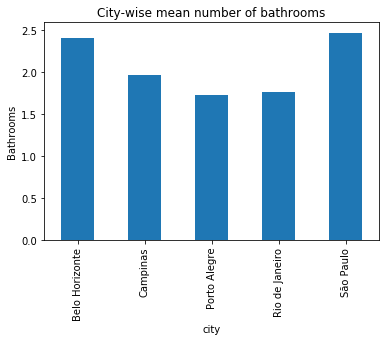

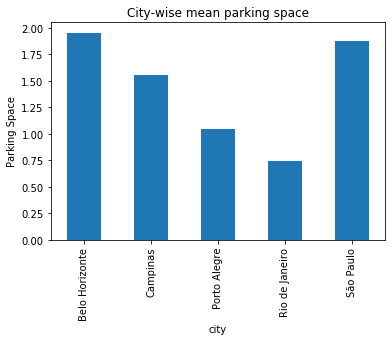

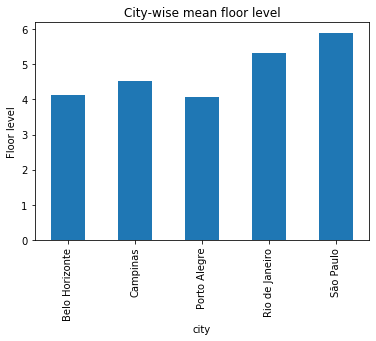

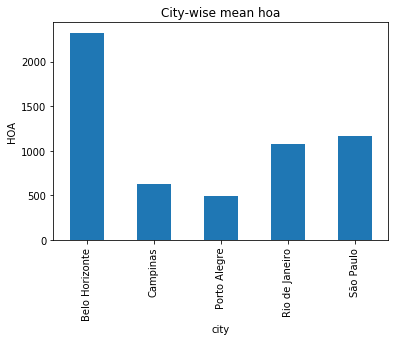

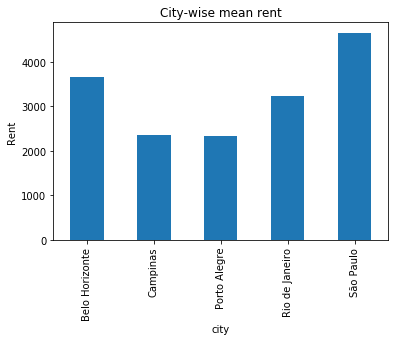

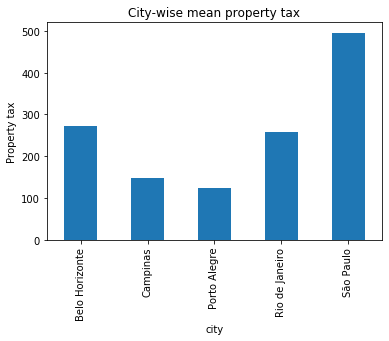

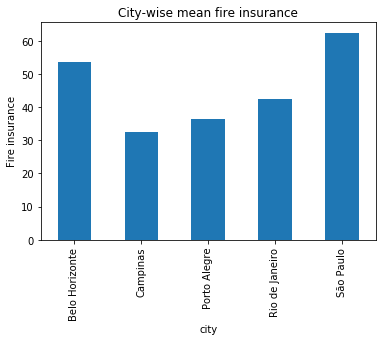

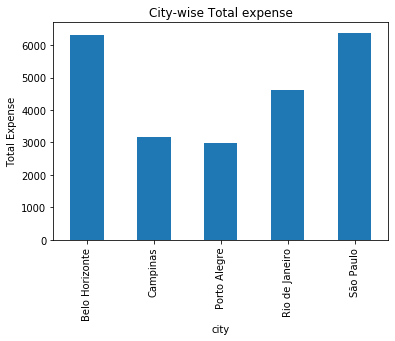

In [6]:
fig, ax = plt.subplots()
ax.set_ylabel('Area')
ax.set_title('City-wise mean area')
cities['area'].plot(kind='bar')
plt.show()

fig, ax = plt.subplots()
ax.set_ylabel('Rooms')
ax.set_title('City-wise mean number of rooms')
cities['rooms'].plot(kind='bar')
plt.show()

fig, ax = plt.subplots()
ax.set_ylabel('Bathrooms')
ax.set_title('City-wise mean number of bathrooms')
cities['bathroom'].plot(kind='bar')
plt.show()

fig, ax = plt.subplots()
ax.set_ylabel('Parking Space')
ax.set_title('City-wise mean parking space')
cities['parking spaces'].plot(kind='bar')
plt.show()

fig, ax = plt.subplots()
ax.set_ylabel('Floor level')
ax.set_title('City-wise mean floor level')
cities['floor'].plot(kind='bar')
plt.show()

fig, ax = plt.subplots()
ax.set_ylabel('HOA')
ax.set_title('City-wise mean hoa')
cities['hoa (R$)'].plot(kind='bar')
plt.show()

fig, ax = plt.subplots()
ax.set_ylabel('Rent')
ax.set_title('City-wise mean rent')
cities['rent amount (R$)'].plot(kind='bar')
plt.show()

fig, ax = plt.subplots()
ax.set_ylabel('Property tax')
ax.set_title('City-wise mean property tax')
cities['property tax (R$)'].plot(kind='bar')
plt.show()

fig, ax = plt.subplots()
ax.set_ylabel('Fire insurance')
ax.set_title('City-wise mean fire insurance')
cities['fire insurance (R$)'].plot(kind='bar')
plt.show()

fig, ax = plt.subplots()
ax.set_ylabel('Total Expense')
ax.set_title('City-wise Total expense')
cities['total (R$)'].plot(kind='bar')

## Method 1 (intuition)

__House Association Tax__

In [7]:
# If the mean of the highest 1000 (any tax) is greater than mean of the data frame which 
# should be lower than the lowest 1000(any tax) then the tax increases number of rooms

hoa_sorted = df.sort_values('hoa (R$)', ascending=False)
if (hoa_sorted.head(1000).mean()['rooms'] > df.mean()['rooms']) and (hoa_sorted.tail(1000).mean()['rooms'] < df.mean()['rooms']):
    print("HOA increases with number of rooms")
elif (hoa_sorted.head(1000).mean()['rooms'] < df.mean()['rooms']) and (hoa_sorted.tail(1000).mean()['rooms'] > df.mean()['rooms']):
    print("HOA decreases with number of rooms")
else:
    print("No specific relation between Hoa and number of rooms")


No specific relation between Hoa and number of rooms


__Property Tax__

In [8]:
property_tax_sorted = df.sort_values('property tax (R$)', ascending=False)
if (property_tax_sorted.head(1000).mean()['rooms'] > df.mean()['rooms']) and (property_tax_sorted.tail(1000).mean()['rooms'] < df.mean()['rooms']):
    print("Property tax increases with number of rooms")
elif (property_tax_sorted.head(1000).mean()['rooms'] < df.mean()['rooms']) and (property_tax_sorted.tail(1000).mean()['rooms'] > df.mean()['rooms']):
    print("Property tax decreases with number of rooms")
else:
    print("No specific relation between Property tax and number of rooms")


Property tax increases with number of rooms


__Fire insurance__

In [9]:
fire_sorted = df.sort_values('fire insurance (R$)', ascending=False)
if (fire_sorted.head(1000).mean()['rooms'] > df.mean()['rooms']) and (fire_sorted.tail(1000).mean()['rooms'] < df.mean()['rooms']):
    print("Fire insurance increases with number of rooms")
elif (fire_sorted.head(1000).mean()['rooms'] < df.mean()['rooms']) and (fire_sorted.tail(1000).mean()['rooms'] > df.mean()['rooms']):
    print("Fire insurance decreases with number of rooms")
else:
    print("No specific relation between Fire insurance and number of rooms")


Fire insurance increases with number of rooms


In [10]:
# Making 2 seperate dataframes depending on if they are furnished or not

furnished = df.loc[df.furniture == 'furnished']
not_furnished = df.loc[df.furniture == 'not furnished']


__House Association Tax__

In [11]:
if (furnished['hoa (R$)'].mean() > df['hoa (R$)'].mean()) and (not_furnished['hoa (R$)'].mean() < df['hoa (R$)'].mean()):
    print("Hoa is higher for furnished rooms rather then non-furnished ones")
elif (furnished['hoa (R$)'].mean() < df['hoa (R$)'].mean()) and (not_furnished['hoa (R$)'].mean() > df['hoa (R$)'].mean()):
    print("Hoa is lower for furnished rooms rather then non-furnished ones")
else:
    print("Hoa is unrelated to furnished rooms or non-furnished ones")

Hoa is higher for furnished rooms rather then non-furnished ones


__Property Tax__

In [12]:
if (furnished['property tax (R$)'].mean() > df['property tax (R$)'].mean()) and (not_furnished['property tax (R$)'].mean() < df['property tax (R$)'].mean()):
    print("Property tax is higher for furnished rooms rather then non-furnished ones")
elif (furnished['property tax (R$)'].mean() < df['property tax (R$)'].mean()) and (not_furnished['property tax (R$)'].mean() > df['property tax (R$)'].mean()):
    print("Property tax is lower for furnished rooms rather then non-furnished ones")
else:
    print("Property tax is unrelated to furnished rooms or non-furnished ones")

Property tax is higher for furnished rooms rather then non-furnished ones


__Fire Insurance__

In [13]:
if (furnished['fire insurance (R$)'].mean() > df['fire insurance (R$)'].mean()) and (not_furnished['fire insurance (R$)'].mean() < df['fire insurance (R$)'].mean()):
    print("fire insurance is higher for furnished rooms rather then non-furnished ones")
elif (furnished['fire insurance (R$)'].mean() < df['fire insurance (R$)'].mean()) and (not_furnished['fire insurance (R$)'].mean() > df['fire insurance (R$)'].mean()):
    print("fire insurance is lower for furnished rooms rather then non-furnished ones")
else:
    print("fire insurance is unrelated to furnished rooms or non-furnished ones")

fire insurance is higher for furnished rooms rather then non-furnished ones


## __One Hot Encoding to generate Dummy variables__

In [14]:
dummy_animal = pd.get_dummies(df.animal)
dummy_furniture = pd.get_dummies(df.furniture)
dummy_city = pd.get_dummies(df.city)

In [15]:
dataframe_linear = pd.concat([df, dummy_animal, dummy_furniture, dummy_city], axis=1)
# print(dataframe_linear)
X = dataframe_linear[['Belo Horizonte','Campinas','Porto Alegre','Rio de Janeiro','São Paulo','area','rooms','bathroom','parking spaces','floor','acept','not acept','furnished','not furnished','hoa (R$)','property tax (R$)','fire insurance (R$)','total (R$)']]
Y = dataframe_linear[['rent amount (R$)']]
X.head()

,Belo Horizonte,Campinas,Porto Alegre,Rio de Janeiro,São Paulo,area,rooms,bathroom,parking spaces,floor,acept,not acept,furnished,not furnished,hoa (R$),property tax (R$),fire insurance (R$),total (R$)
0,0,0,0,0,1,70,2,1,1,7,1,0,1,0,2065,211,42,5618
1,0,0,0,0,1,320,4,4,0,20,1,0,0,1,1200,1750,63,7973
2,0,0,1,0,0,80,1,1,1,6,1,0,0,1,1000,0,41,3841
3,0,0,1,0,0,51,2,1,0,2,1,0,0,1,270,22,17,1421
4,0,0,0,0,1,25,1,1,0,1,0,1,0,1,0,25,11,836


## Method 2 (df.corr())

__House Association Tax__

In [16]:
round(dataframe_linear.corr()['hoa (R$)'], 3)

area                   0.007
rooms                  0.007
bathroom               0.050
parking spaces         0.009
floor                  0.018
hoa (R$)               1.000
rent amount (R$)       0.036
property tax (R$)      0.008
fire insurance (R$)    0.030
total (R$)             0.955
acept                 -0.022
not acept              0.022
furnished              0.003
not furnished         -0.003
Belo Horizonte         0.027
Campinas              -0.010
Porto Alegre          -0.016
Rio de Janeiro        -0.002
São Paulo             -0.000
Name: hoa (R$), dtype: float64

In [17]:
# The House association Tax doesn't really vary much with any property
# other than the total column which it varies significantly with.

# Furnished rooms have slightly larger HOA as compared to Non Furnished

__Property Tax__

In [18]:
round(dataframe_linear.corr()['property tax (R$)'], 3)

area                   0.039
rooms                  0.075
bathroom               0.109
parking spaces         0.098
floor                  0.014
hoa (R$)               0.008
rent amount (R$)       0.108
property tax (R$)      1.000
fire insurance (R$)    0.106
total (R$)             0.218
acept                 -0.003
not acept              0.003
furnished              0.001
not furnished         -0.001
Belo Horizonte        -0.011
Campinas              -0.021
Porto Alegre          -0.028
Rio de Janeiro        -0.014
São Paulo              0.046
Name: property tax (R$), dtype: float64

In [19]:
# Property Tax increases with area, rooms, bathroom, parking spaces, rent, fire insurance, total.

# Doesn't vary with HOA as expected from previous analysis.

# Furnished rooms have a slightly higher Property tax than their Non Furnished counterparts.

__Fire Insurance__

In [20]:
round(dataframe_linear.corr()['fire insurance (R$)'], 3)

area                   0.188
rooms                  0.565
bathroom               0.676
parking spaces         0.597
floor                  0.033
hoa (R$)               0.030
rent amount (R$)       0.987
property tax (R$)      0.106
fire insurance (R$)    1.000
total (R$)             0.255
acept                  0.079
not acept             -0.079
furnished              0.142
not furnished         -0.142
Belo Horizonte         0.003
Campinas              -0.129
Porto Alegre          -0.125
Rio de Janeiro        -0.092
São Paulo              0.212
Name: fire insurance (R$), dtype: float64

In [21]:
# Fire insurance increases with area, rooms, bathroom, rent, property tax, total.

# Doesn't vary with HOA as expected from previous analysis.

# Furnished rooms have higher Fire insurance than Non-Furnished.

## Linear Regression

In [22]:
X_train = X.iloc[:10000]
X_test = X.iloc[10000:]
Y_train = Y.iloc[:10000]
Y_test = Y.iloc[10000:]

In [23]:
regressor = LinearRegression().fit(X_train,Y_train)
Y_pred = regressor.predict(X_test)

In [24]:
# Converting Y_test which is a dataframe to numpy array and making it one dimensional
# Dont run this more than once

Y_test = Y_test.to_numpy()
Y_test = Y_test[:,0]
# Y_test

In [25]:
# Making Y_pred one dimensional, dont run more than once

Y_pred = Y_pred[:,0]
# Y_pred

In [26]:
coeff_df = pd.DataFrame(regressor.coef_.T, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Belo Horizonte,-0.232530
Campinas,0.107155
Porto Alegre,0.076046
Rio de Janeiro,0.170402
São Paulo,-0.121073
area,-0.000027
rooms,0.080845
bathroom,-0.039684
parking spaces,0.013543
floor,0.017118


In [29]:
df1 = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
df1.head(20)

,Actual,Predicted
0,3080,3079.614568
1,1100,1099.584928
2,2100,2099.890649
3,1990,1989.556666
4,3200,3199.636673
5,1440,1439.708007
6,3958,3957.877945
7,3950,3950.005138
8,1100,1099.822744
9,1200,1200.034045
